# Árboles de regresión

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.shape

(506, 14)

In [7]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [10]:
regtree.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [11]:
preds = regtree.predict(data[predictors])

In [12]:
data["preds"] = preds

In [13]:
data[["preds", "medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
5,24.058621,28.7
6,20.811111,22.9
7,20.020833,27.1
8,20.020833,16.5
9,20.020833,18.9


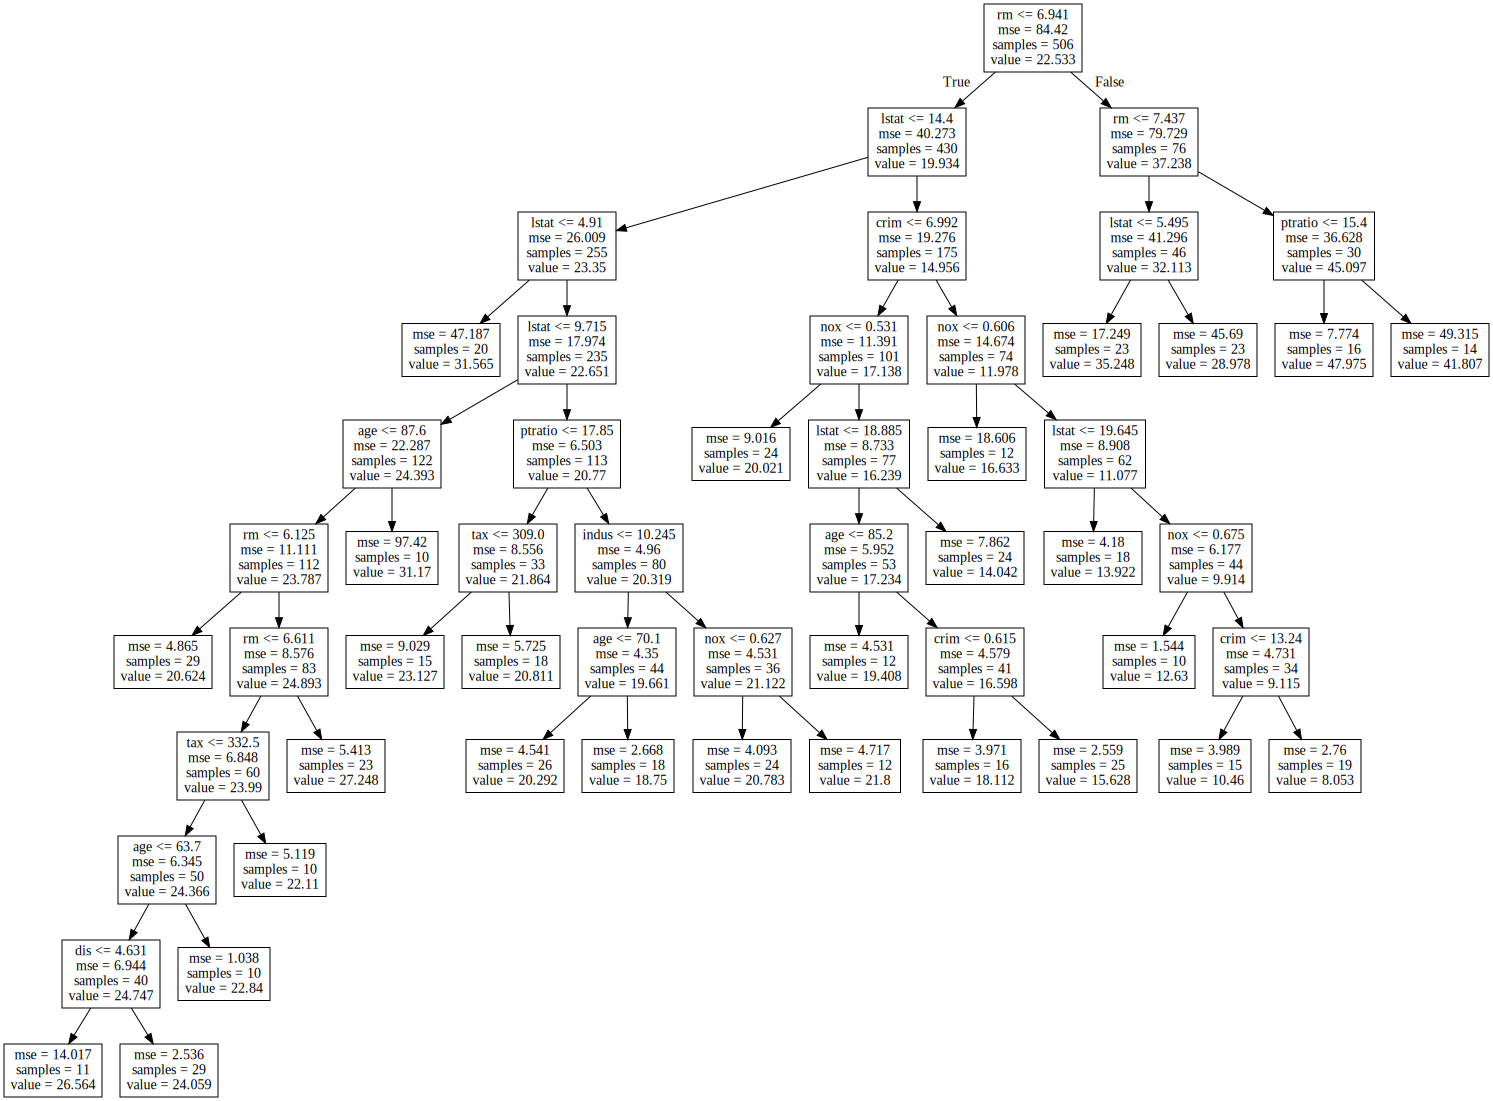

In [14]:
from sklearn.tree import export_graphviz
with open("C:/Users/Megaport/Desktop/python/datos machine learning/boston/Boston.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
import os# se utiliza para abrir los textos en .doc
os.environ["PATH"] += os.pathsep + 'C:/Users/Megaport/Desktop/python/datos machine learning/iris/release/bin'
from graphviz import Source
file = open("C:/Users/Megaport/Desktop/python/datos machine learning/boston/Boston.dot", "r")
text = file.read()
Source(text)

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
import sklearn.metrics #Sacamos el listado que tenemos para poner abajo entre comillas
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [17]:
cv = KFold(n_splits= 10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[-13.64925886 -17.28987161 -16.98569707 -47.56954086  -9.26202865
 -17.23057023 -15.41541493 -31.33011027 -22.79877067  -9.54180723]
-20.107307036443846


In [18]:
list(zip(predictors, regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

## Random Fores 

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=500)
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=2, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred", "medv"]]

,rforest_pred,medv
0,28.430851,24.0
1,22.691753,21.6
2,34.248837,34.7
3,35.022872,33.4
4,34.358385,36.2
5,24.036517,28.7
6,20.394857,22.9
7,17.265031,27.1
8,18.478022,16.5
9,19.659391,18.9


In [22]:
data["rforest_error2"] = (data["rforest_pred"]-data["medv"])**2
sum(data["rforest_error2"])/len(data)

9.896335737948544

In [23]:
forest.oob_score_

0.8827719998948871

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [25]:
lab_enc = preprocessing.LabelEncoder()
Y = lab_enc.fit_transform(Y)
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [28]:
oob_decision_function_

NameError: name 'oob_decision_function_' is not defined